<a href="https://colab.research.google.com/github/C3578/Segmentation_graph_images/blob/master/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import random
import os
from tqdm import tqdm

In [ ]:
from fastai.vision import *

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
data_root = '..'
list_ = os.listdir(data_root)

In [ ]:
img_1 = cv2.imread(data_root + '27.bmp')

In [ ]:
img_1.shape[1]

1419

In [ ]:
def create_df(a, b, c, img_1):
  b = np.array(np.where((img_1[:,:, 0] == a) & (img_1[:,:, 1] == b) & (img_1[:,:, 2] == c)))
  d = {a: list([]) for a in range(img_1.shape[1])}

  for i in enumerate(b[1]):
    d[i[1]] += [b[0][i[0]]]

  for i in d:
    if len(d[i]) > 0:
      d[i] = img_1.shape[0] - max(d[i])
    else:
      d[i] = float('NaN')
  
  df = pd.DataFrame(d.values(), index = d.keys())

  return df

In [ ]:
df_2 = create_df(255, 0, 255, img_1)

In [ ]:
df_2.head(20)

,0
0,254.0
1,254.0
2,258.0
3,265.0
4,273.0
5,290.0
6,316.0
7,343.0
8,359.0
9,365.0


In [ ]:
df_2.describe()

,0
count,1386.000000
mean,235.857864
std,57.175611
min,1.000000
25%,205.000000
50%,235.000000
75%,268.000000
max,465.000000


In [ ]:
data = df_2.fillna(df_2.median(axis=0), axis=0)

In [ ]:
data.describe()

,0
count,1419.000000
mean,235.837914
std,56.506541
min,1.000000
25%,206.000000
50%,235.000000
75%,266.000000
max,465.000000


# Посмотрим что получилось.

In [ ]:
import matplotlib.pyplot as plt

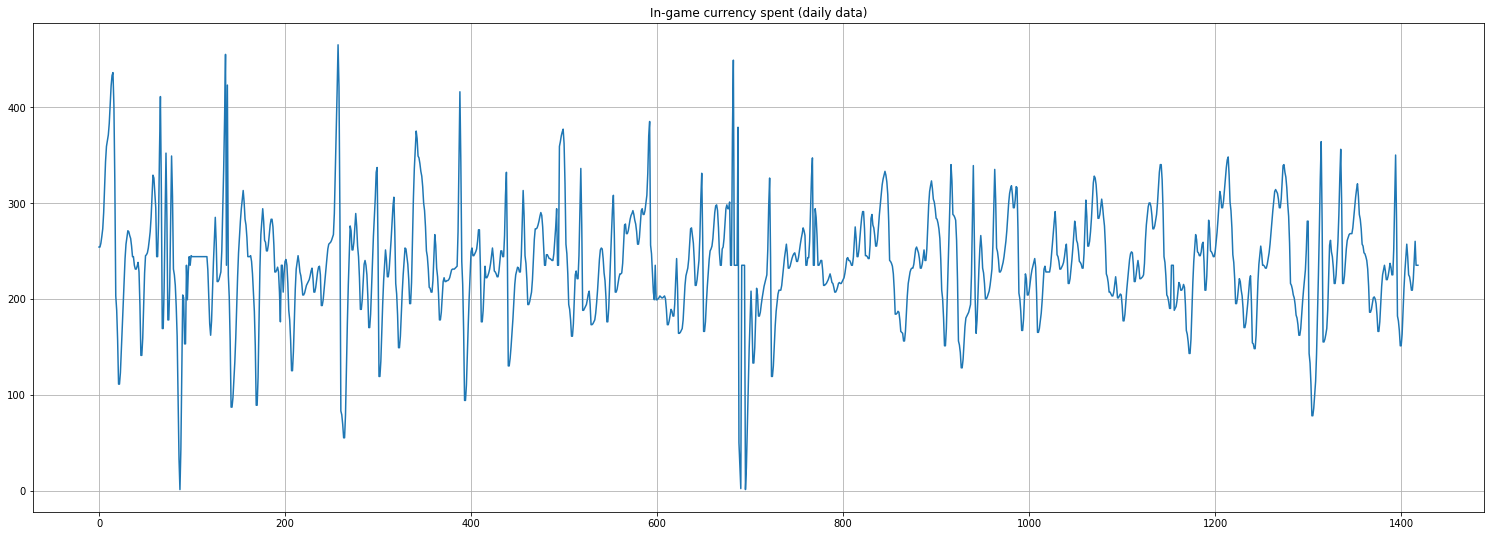

In [ ]:
plt.figure(figsize=(26, 9))
plt.plot(data)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

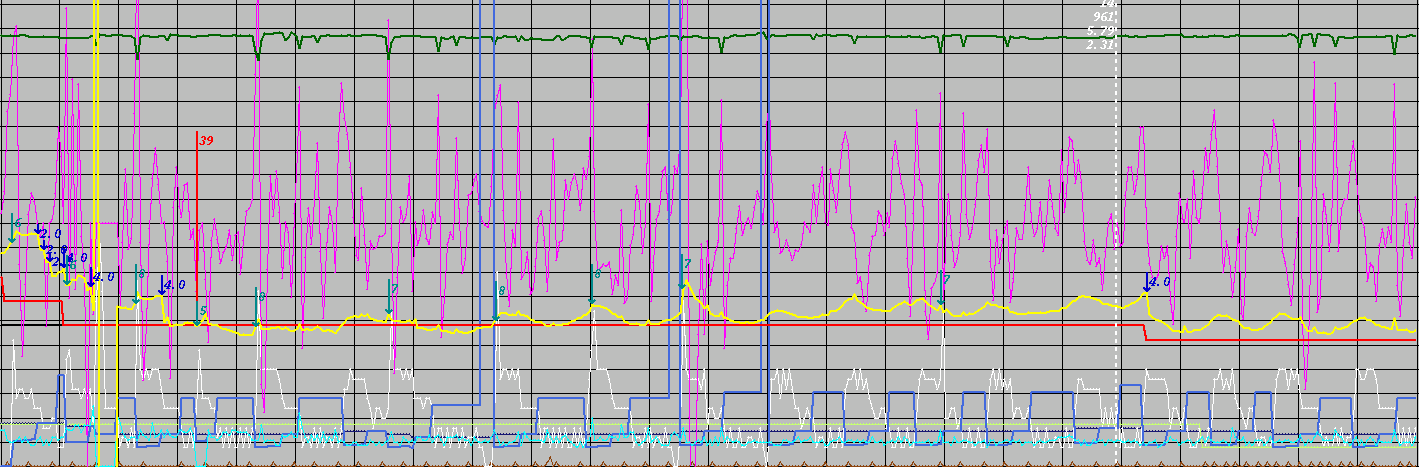

In [ ]:
  cv2_imshow(img_1)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

# Построим модель и попробуем предсказать поведение нашего графика.

In [ ]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    test_index = int(len(data)*(1-test_size))

    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    data = data.dropna()
    data = data.reset_index(drop=True)

    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = prepareData(data, test_size=0.3, lag_start=12, lag_end=48)

In [ ]:
from sklearn.linear_model import LinearRegression

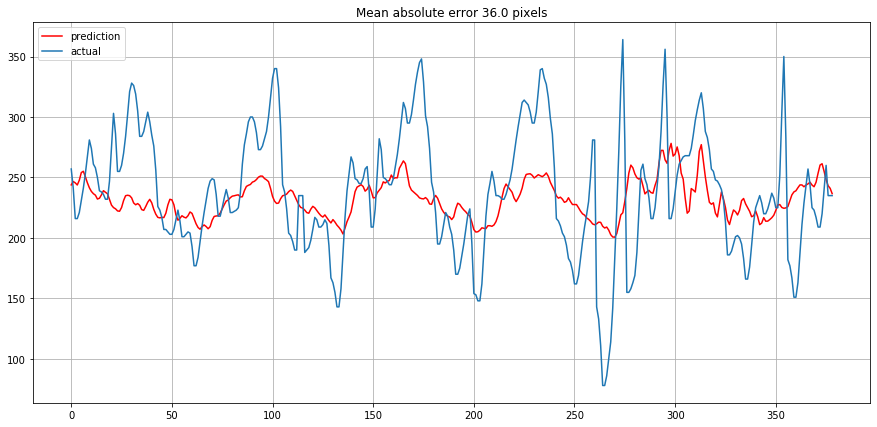

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Mean absolute error {} pixels".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True)